## Black Friday Dataset EDA and Feture Engineering
### Preparing the data for model training

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [33]:
#concating both datasets
df_final = pd.concat([df,df_test]) 
df_final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [34]:
#dropping unnecessary columns
df_final.drop(["User_ID"], axis=1, inplace=True)

In [35]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [36]:
#handling Categorical feature gender
df_final["Gender"]= df_final["Gender"].map({"F":0,"M":1})
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [37]:
df_final["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [38]:
#now handling categorical feature age
df_final["Age"] = df_final["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [39]:
#now handling categorical feature City Category 
df_city = pd.get_dummies(df_final["City_Category"], drop_first=True).astype(int)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [40]:
df  = pd.concat([df_final, df_city], axis=1 )
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [41]:
df.drop(["City_Category"],axis=1 ,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [42]:
#checking missing values
df.info()
df.isnull().sum()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


(783667, 12)

In [43]:
#handling missing values
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [44]:
df["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [45]:
#replacing missing values with mode
df["Product_Category_2"]= df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [46]:
df["Product_Category_2"].isnull().sum()

0

In [47]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [48]:
df["Product_Category_3"].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [49]:
df["Product_Category_3"]= df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [50]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [51]:
df.drop("Stay_In_Current_City_Years",axis=1,inplace=True)

In [52]:
df.head()

,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,0,8,8.0,16.0,7969.0,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_ID          783667 non-null  object 
 1   Gender              783667 non-null  int64  
 2   Age                 783667 non-null  int64  
 3   Occupation          783667 non-null  int64  
 4   Marital_Status      783667 non-null  int64  
 5   Product_Category_1  783667 non-null  int64  
 6   Product_Category_2  783667 non-null  float64
 7   Product_Category_3  783667 non-null  float64
 8   Purchase            550068 non-null  float64
 9   B                   783667 non-null  int32  
 10  C                   783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 65.8+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

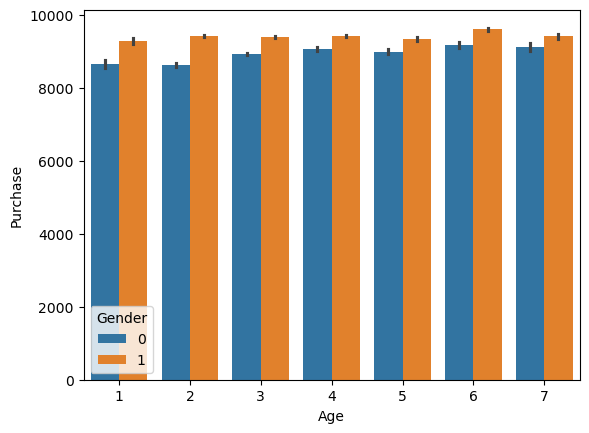

In [54]:
## who has bought most amount of goods
sns.barplot(x ="Age",y = "Purchase" ,hue="Gender",data=df)

 Obesrvation:  Quite surprisingly Men bought more than women


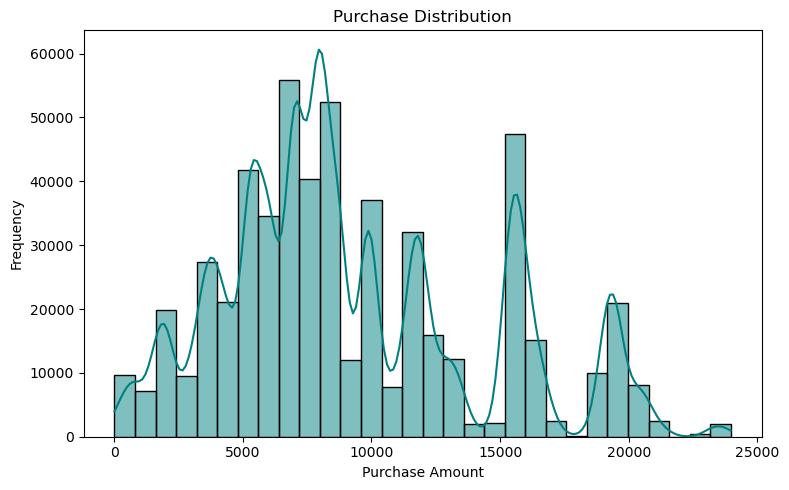

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18860\1744039488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=df, estimator='mean', palette='viridis')


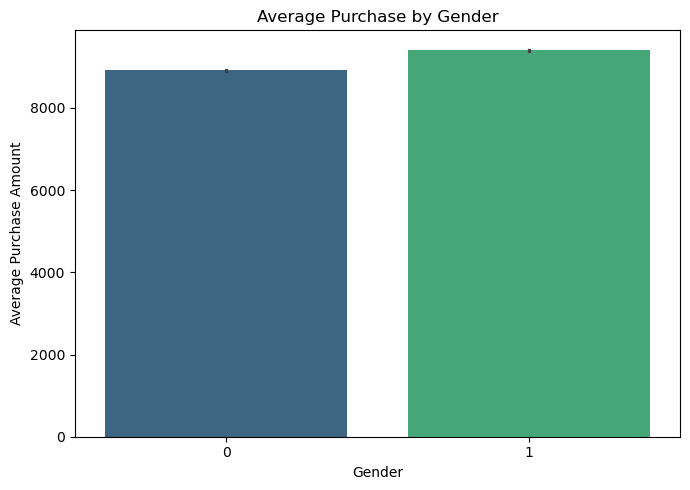

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18860\1744039488.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=df, estimator='mean', palette='coolwarm')


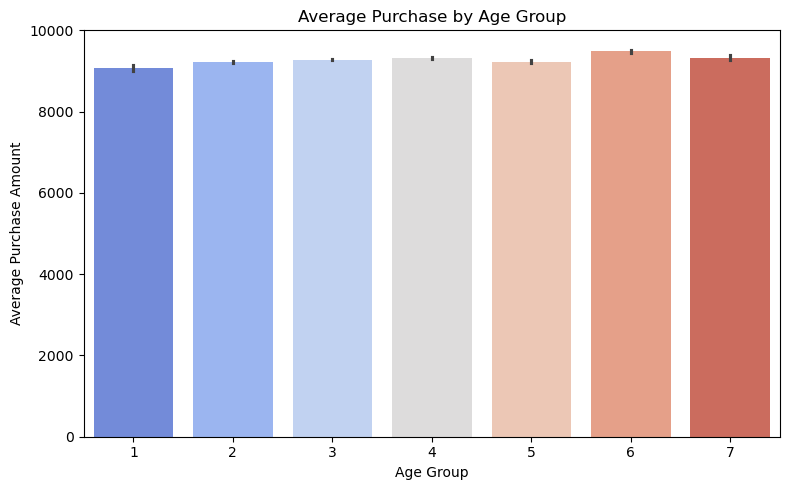

In [58]:
import os
# Purchase Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Purchase'], bins=30, kde=True, color='teal')
plt.title("Purchase Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("images/purchase_distribution.png")
plt.show()


plt.figure(figsize=(7,5))
sns.barplot(x='Gender', y='Purchase', data=df, estimator='mean', palette='viridis')
plt.title("Average Purchase by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount")
plt.tight_layout()
plt.savefig("images/gender_vs_purchase.png")
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='Purchase', data=df, estimator='mean', palette='coolwarm')
plt.title("Average Purchase by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.tight_layout()
plt.savefig("images/age_vs_purchase.png")
plt.show()


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

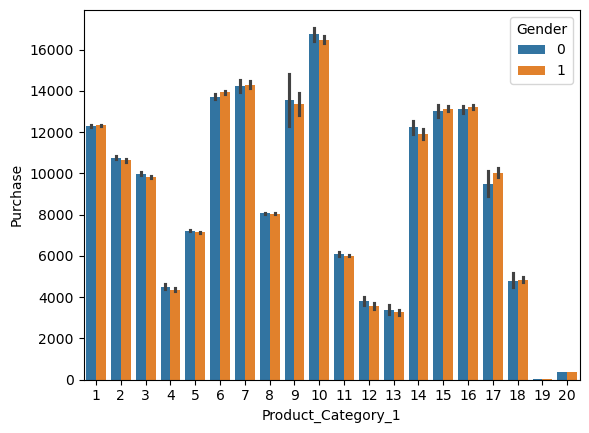

In [59]:
# Now checking which category has been bought the most
sns.barplot(x ="Product_Category_1",y = "Purchase" ,hue="Gender",data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

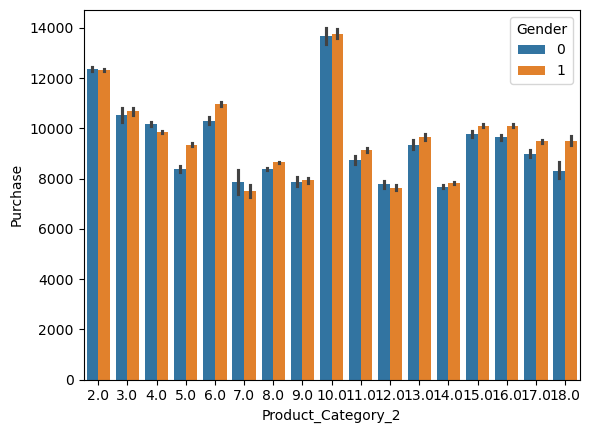

In [60]:
sns.barplot(x ="Product_Category_2",y = "Purchase" ,hue="Gender",data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

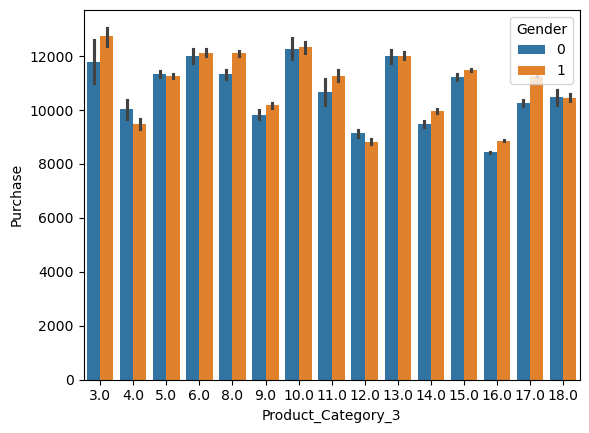

In [61]:
sns.barplot(x ="Product_Category_3",y = "Purchase" ,hue="Gender",data=df)

Observation: Product category 1 has sold more than other two categories

In [62]:
#splitting training and testing Data
df_test = df[df["Purchase"].isnull()]
df_train = df[~df["Purchase"].isnull()]

In [63]:
X = df_train.drop(["Purchase"],axis=1)
y = df_train["Purchase"]


model = LinearRegression()
sc = StandardScaler()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
X_train.drop(["Product_ID"],axis=1,inplace=True)
X_test.drop(["Product_ID"],axis=1,inplace=True)

## feature scaling

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Linear Regression Results:
MAE: 3575.5358222084305
RMSE: 4674.407133844803
R2 Score: 0.13038583259231107


Observation: linear regression is not the best fit for this dataset Black Friday purchase behavior is highly nonlinear now we will try other algorithms

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_split=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rrmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rr2 = r2_score(y_test, y_pred_rf)
rmae = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Results:")
print("MAE:",rmae)
print("RMSE:", rrmse)
print("R2:", rr2)


Random Forest Results:
MAE: 2199.671130031433
RMSE: 2942.109203229864
R2: 0.6554985046392133


In [70]:

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

xrmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
xr2 = r2_score(y_test, y_pred_rf)
xmae = mean_absolute_error(y_test, y_pred_rf)

print("XGBoost Results:")
print("MAE:", xmae)
print("RMSE:", xrmse)
print("R2:", xr2)


XGBoost Results:
MAE: 2199.671130031433
RMSE: 2942.109203229864
R2: 0.6554985046392133


In [71]:

models = pd.DataFrame({"Models":["Linear Regression","Random Forest ","XGBOOST"],
    "MAE":[(mae),(rmae),(xmae)],
     "RMSE":[(rmse),(rrmse),(xrmse)],
     "R2 Score":[(r2),(rr2),(xr2)]})

models

,Models,MAE,RMSE,R2 Score
0,Linear Regression,3575.535822,4674.407134,0.130386
1,Random Forest,2199.671130,2942.109203,0.655499
2,XGBOOST,2199.671130,2942.109203,0.655499
